# <font color='red'> Project 1

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from math import sqrt
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error


In [3]:
audit=pd.read_csv('audit_risk.csv')
trial=pd.read_csv('trial.csv')

In [4]:
audit.drop(['Prob','Detection_Risk'],axis=1)
trial=trial.drop(['Sector_score', 'LOCATION_ID','PARA_A','SCORE_A','PARA_B','SCORE_B','Risk','TOTAL','numbers','History','Money_Value','Score'], axis=1)

In [5]:
#In order to merge, a new index column is added
audit['Project'] = audit.index.values
trial['Project'] = trial.index.values


In [6]:
df = pd.merge(audit,trial, on='Project', how='inner')
df.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk', 'Project', 'Marks',
       'MONEY_Marks', 'District', 'Loss', 'LOSS_SCORE', 'History_score'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 776 entries, 0 to 775
Data columns (total 34 columns):
Sector_score      776 non-null float64
LOCATION_ID       776 non-null object
PARA_A            776 non-null float64
Score_A           776 non-null float64
Risk_A            776 non-null float64
PARA_B            776 non-null float64
Score_B           776 non-null float64
Risk_B            776 non-null float64
TOTAL             776 non-null float64
numbers           776 non-null float64
Score_B.1         776 non-null float64
Risk_C            776 non-null float64
Money_Value       775 non-null float64
Score_MV          776 non-null float64
Risk_D            776 non-null float64
District_Loss     776 non-null int64
PROB              776 non-null float64
RiSk_E            776 non-null float64
History           776 non-null int64
Prob              776 non-null float64
Risk_F            776 non-null float64
Score             776 non-null float64
Inherent_Risk     776 non-null float64
CON

In [8]:
df['LOCATION_ID'].unique()

array(['23', '6', '7', '8', '13', '37', '24', '3', '4', '14', '5', '20',
       '19', '21', '22', '9', '11', '12', '29', '30', '38', '31', '2',
       '32', '16', '33', '15', '36', '34', '18', '25', '39', '27', '35',
       '40', '41', '42', '1', '28', 'LOHARU', 'NUH', 'SAFIDON', '43',
       '44', '17'], dtype=object)

In [9]:
df.LOCATION_ID.replace(['LOHARU', 'NUH','SAFIDON'], [10, 26,45], inplace=True)

In [10]:
df['LOCATION_ID']=df['LOCATION_ID'].astype(int)

In [11]:
#To check for outliners in the data
#Example - 1264 is max value in PARA_B which clearly indicates the presence of outliners.
df.describe()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,Detection_Risk,Audit_Risk,Risk,Project,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,...,776.0,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,20.184536,14.903351,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,13.218481,5.067655,...,0.5,7.168158,0.393041,387.500000,2.237113,2.909794,2.505155,0.029639,2.061856,2.167526
std,24.319017,9.940841,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,51.312829,0.264449,...,0.0,38.667494,0.488741,224.156196,0.803517,1.597452,1.228678,0.184280,0.375080,0.679869
min,1.850000,1.000000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,...,0.5,0.280000,0.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000
25%,2.370000,8.000000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.537500,5.000000,...,0.5,0.316700,0.000000,193.750000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000
50%,3.890000,13.000000,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,1.370000,5.000000,...,0.5,0.555600,0.000000,387.500000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000
75%,55.570000,19.000000,2.480000,0.600000,1.488000,4.160000,0.400000,1.840500,7.707500,5.000000,...,0.5,3.249900,1.000000,581.250000,2.000000,4.000000,2.000000,0.000000,2.000000,2.000000
max,59.850000,45.000000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,...,0.5,961.514400,1.000000,775.000000,6.000000,6.000000,6.000000,2.000000,6.000000,6.000000


In [12]:
#Treating the outliners in the data
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1

In [13]:
mask = ((df[['PARA_A', 'Score_A', 'PARA_B', 'Score_B','Inherent_Risk','Money_Value']] < (Q1 - 30 * IQR)) 
        | (df[['PARA_A', 'Score_A', 'PARA_B', 'Score_B','Inherent_Risk','Money_Value']] > (Q3 + 30 * IQR)))
#mask.sum()
df[mask]= np.NaN

In [14]:
df.isnull().sum()

Sector_score       0
LOCATION_ID        0
PARA_A             2
Score_A            0
Risk_A             0
PARA_B             4
Score_B            0
Risk_B             0
TOTAL              0
numbers            0
Score_B.1          0
Risk_C             0
Money_Value       11
Score_MV           0
Risk_D             0
District_Loss      0
PROB               0
RiSk_E             0
History            0
Prob               0
Risk_F             0
Score              0
Inherent_Risk      5
CONTROL_RISK       0
Detection_Risk     0
Audit_Risk         0
Risk               0
Project            0
Marks              0
MONEY_Marks        0
District           0
Loss               0
LOSS_SCORE         0
History_score      0
dtype: int64

In [15]:
df = df.dropna()

In [16]:
df=df.fillna(df.median())

In [17]:
df=df.drop(['Sector_score','LOCATION_ID','Project'],axis=1)

# Data Preprocessing

In [24]:
# split dataset ( Audit_Risk as target for regression)
from sklearn.model_selection import train_test_split
X = df.drop(['Audit_Risk','Risk'], axis = 1)
y = df['Audit_Risk']
X.columns
df.shape

(761, 31)

In [25]:
f = open('result,csv', 'w')
line  = 'Model_name,Model_params,Train_score,Test_score\n'
f.write(line)
f.close()

##### To reduce loss of information, we already treated outliners,so we used MinMaxScaler which essentially shrinks the range such that the range is now between 0 and 1 (or -1 to 1 if there are negative values).

##### On safer side, we used RobustScaler since the data has outliners which were above IQR*1.5. The RobustScaler uses a method to the Min-Max scaler but instead uses the interquartile range, rathar than the min-max, so that it is robust to outliers xi–Q1(x)Q3(x)–Q1(x) for each feature. Of course this means it is using the less of the data for scaling so it’s more suitable for outliers in the data.


In [26]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

# REGRESSION

## Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train, y_train)
a=print(lreg.score(X_train, y_train))
b=print(lreg.score(X_test, y_test))

0.8734328454331153
0.8670236766024231


Text(0.5, 0, 'PARA B')

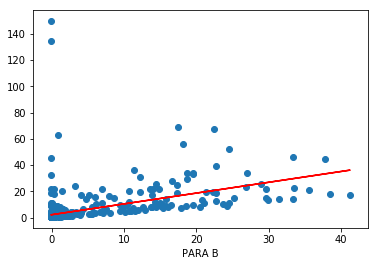

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

X_train_b = X_train[:,5].reshape(-1,1)
lreg.fit(X_train_b, y_train)
y_predict = lreg.predict(X_train_b)

plt.plot(X_train_b, y_predict, c = 'r')
plt.scatter(X_train_b,y_train)
plt.xlabel('PARA B')


In [22]:
f = open('result.csv', 'a')
line = 'Linear Regression, , ' + str(a) + ',' + str(b) + '\n'
f.write(line)
f.close()

In [23]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lreg, X, y, scoring='r2')
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [-0.49414668  0.65018278  0.61490074]


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [24]:
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.26


# SVR

In [325]:
from sklearn.svm import SVR

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [326]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
grid_search = GridSearchCV(SVR(), param_grid, cv=5, return_train_score=True)

In [327]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [328]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 1, 'gamma': 0.1}
Best cross-validation score: 0.94


In [329]:
from sklearn.svm import SVR

train_score_list = []
test_score_list = []
gamma_plot = []
c_plot = []

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        for kernel in ['rbf','linear']:
            svr = SVR(gamma=gamma, C=C)
            svr.fit(X_train,y_train)
            train_score_list.append(svr.score(X_train,y_train))
            score = svr.score(X_test, y_test)
            test_score_list.append(score)
            gamma_plot.append(gamma)
            c_plot.append(C)
            if score > best_score:
                best_score = score
                best_parameters = {'gamma': gamma , 'C' : C,'kernel':kernel}
                best_Gamma = gamma
                best_C = C
                best_kernel = kernel

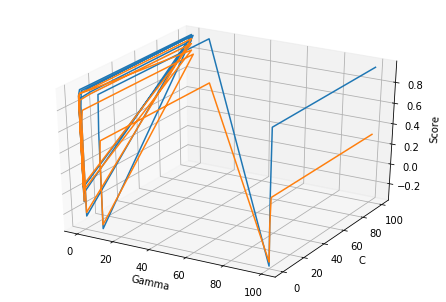

Best score: 0.94
Best parameters: {'gamma': 0.1, 'C': 1, 'kernel': 'rbf'}


In [ ]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = Axes3D(fig)


ax.plot(xs=gamma_plot, ys=c_plot, zs=train_score_list)
ax.plot(xs=gamma_plot, ys=c_plot, zs=test_score_list)

ax.set_xlabel('Gamma')
ax.set_ylabel('C')
ax.set_zlabel('Score')
#ax.view_init(180, 0)
#ax.plot_surface(xs,ys,zs)


plt.show()

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

In [ ]:
svr_cv1 = SVR(gamma = 0.1, C = 100,kernel='linear')
scores = cross_val_score(svr_cv1, X, y, cv = 5, scoring = 'r2')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

In [ ]:
svr_cv = SVR(gamma = 0.1, C = 100,kernel='poly')
scores = cross_val_score(svr_cv, X, y, cv = 5, scoring = 'r2')
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

In [ ]:
svr_cv = SVR(gamma = 0.1, C = 100,kernel='rbf')
scores = cross_val_score(svr_cv, X, y, cv = 5, scoring = 'r2')
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

In [ ]:

svr.fit(X_train,y_train)
print(svr.score(X_train, y_train))
print(svr.score(X_test, y_test))

In [ ]:
f = open('result.csv', 'a')
line = 'SVM, gamma: 0.01 C: 100 kernel: rbf, ' + str(svr.score(X_train, y_train)) + ',' + str(svr.score(X_test, y_test)) + '\n'
f.write(line)
f.close()

# KNN Regressor

In [27]:

params = {'n_neighbors':[1,2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Text(0, 0.5, 'MSE')

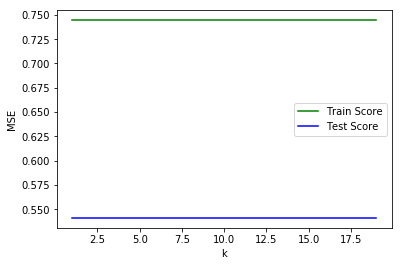

In [28]:
%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,20):
    knn_reg = KNeighborsRegressor()
    knn_reg.fit(X_train, y_train)
    train_score_array.append(knn_reg.score(X_train, y_train))
    test_score_array.append(knn_reg.score(X_test, y_test))

x_axis = range(1,20)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

In [35]:
knn=KNeighborsRegressor(4)   
knn.fit(X_train,y_train)
train_score=knn.score(X_train,y_train)
test_score=knn.score(X_test,y_test)

print('Train score=',train_score,'Test score=',test_score)
    

Train score= 0.7611121303999443 Test score= 0.5896301205837098


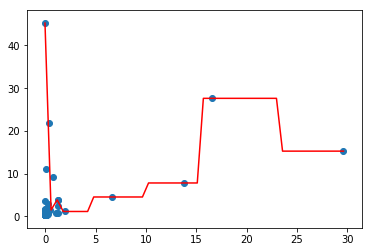

In [36]:
#For 2 variables
X_b = X_train[:50,5].reshape(-1,1)
y_b = y_train[:50]

knn_reg = KNeighborsRegressor(1)
knn_reg.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = knn_reg.predict(X_new)

plt.plot(X_new, y_predict, c = 'r')
plt.scatter(X_b, y_b)

In [29]:
from sklearn.metrics import mean_squared_error 
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 5.71747384797669
RMSE value for k=  2 is: 6.4343983649405585
RMSE value for k=  3 is: 6.212703741955921
RMSE value for k=  4 is: 6.1271605665572455
RMSE value for k=  5 is: 6.479277310642454
RMSE value for k=  6 is: 6.176607152166409
RMSE value for k=  7 is: 6.508273352497954
RMSE value for k=  8 is: 6.776884549531449
RMSE value for k=  9 is: 6.617055595720174
RMSE value for k=  10 is: 6.552625816839068
RMSE value for k=  11 is: 6.404366440351588
RMSE value for k=  12 is: 6.39553291778256
RMSE value for k=  13 is: 6.292286225870204
RMSE value for k=  14 is: 6.2470589004746016
RMSE value for k=  15 is: 6.296310429211411
RMSE value for k=  16 is: 6.262292934287571
RMSE value for k=  17 is: 6.083859467045782
RMSE value for k=  18 is: 6.091262344127547
RMSE value for k=  19 is: 6.097423686635491
RMSE value for k=  20 is: 6.1410014818115135


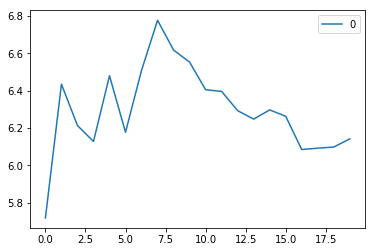

In [30]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()
#As we discussed, when we take k=1, we get a very high RMSE value. The RMSE value decreases as we increase the k value. At k= 7, the RMSE is approximately 1219.06, and shoots up on further increasing the k value. We can safely say that k=7 will give us the best result in this case.

#These are the predictions using our training dataset. Let us now predict the values for test dataset and make a submission

In [31]:
knn_cv = knn_reg
scores = cross_val_score(knn_reg, X, y, cv = 6)
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [-0.69624511 -0.30052477  0.02412082  0.30088567  0.89286416  0.1191314 ]
Average cross-validation score: 0.06


In [32]:
f = open('result.csv', 'a')
line = 'KNeighborsRegressor, n_neighbors = 2, ' + str(train_score) + ',' + str(test_score) + '\n'
f.write(line)
f.close()

# 3- SGDRegressor

- ``max_iter in [1000, 5000, 10000]``
- ``penalty in ['l1', 'l2']``

In [33]:
from sklearn.linear_model import SGDRegressor

train_l1 = []
test_l1 = []
train_l2 = []
test_l2 = []

for max_iter in [1000, 5000, 10000]:
    #create the model
    sgd_l1 = SGDRegressor(max_iter = max_iter, penalty= 'l1')
    sgd_l2 = SGDRegressor(max_iter = max_iter, penalty= 'l2')
    
    #train the model
    sgd_l1.fit(X_train, y_train)
    sgd_l2.fit(X_train, y_train)
    
    #evaluation
    train_l1.append(sgd_l1.score(X_train, y_train))
    test_l1.append(sgd_l1.score(X_test, y_test))
    train_l2.append(sgd_l2.score(X_train, y_train))
    test_l2.append(sgd_l2.score(X_test, y_test))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If

Text(0.5, 0, 'max_iter')

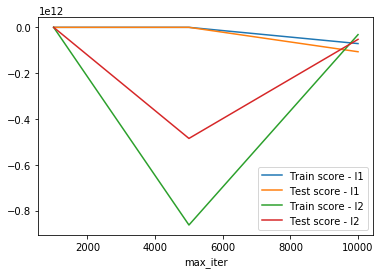

In [34]:
%matplotlib inline

plt.plot([1000, 5000, 10000], train_l1 , label = 'Train score - l1')
plt.plot([1000, 5000, 10000], test_l1 , label = 'Test score - l1')
plt.plot([1000, 5000, 10000], train_l2 , label = 'Train score - l2')
plt.plot([1000, 5000, 10000], test_l2 , label = 'Test score - l2')

plt.legend()
plt.xlabel('max_iter')

# 4- Ridge

In [35]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

params={'alpha': [25,10,4,2,1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01]}
rdg_reg = Ridge()
clf = GridSearchCV(rdg_reg,params,cv=2,verbose = 1, scoring = 'neg_mean_squared_error')
clf.fit(X_train,y_train)

clf.best_params_

Fitting 2 folds for each of 13 candidates, totalling 26 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    0.1s finished


{'alpha': 25}

In [36]:
from  sklearn.linear_model import Ridge

x_range = [25,10,4,2,1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))

Text(0.5, 0, '$\\alpha$')

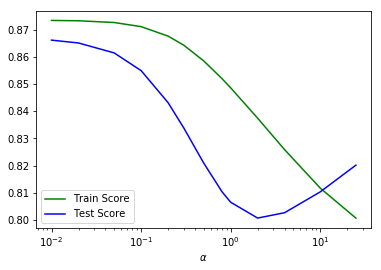

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [38]:
print(train_score_list)
print(test_score_list)

[0.8006730381148368, 0.8117023761238442, 0.8258529504772404, 0.8374252706624351, 0.8485949860886343, 0.8519781176479474, 0.858504003124737, 0.8642619071996147, 0.867628822636166, 0.8711103980608096, 0.8726297011471689, 0.8732672047200691, 0.8733870428879162]
[0.820156572982739, 0.8103284256018933, 0.802663465081372, 0.8006890123426825, 0.806508847791373, 0.8103765121751793, 0.8209168301080293, 0.8337937258653916, 0.8431507808824501, 0.8549367660536156, 0.8614470419579161, 0.8650972670472122, 0.8661431889668358]


In [39]:
ridge = Ridge(alpha = 25)
ridge.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ridge.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test, y_test)))



Train score: 0.8007
Test score: 0.8202


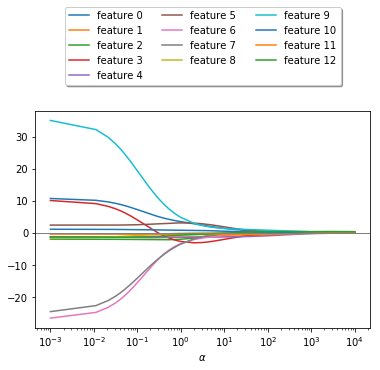

In [40]:
%matplotlib inline
import numpy as np

x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,13):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

In [41]:

scores = cross_val_score(rdg_reg, X, y, cv = 6, scoring = 'r2')
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))


Cross-validation scores: [ 0.17646941  0.03106389  0.24162649  0.62708199  0.63158816 -1.12378527]
Average cross-validation score: 0.10


In [42]:
f = open('result', 'a')
line = 'Ridge, alpha = 25, ' + str(ridge.score(X_train,y_train)) + ',' + str(ridge.score(X_test, y_test)) + '\n'
f.write(line)
f.close()

# 4- Lasso

In [43]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

params={'alpha': [0.01, 0.1, 1, 10, 100]}
Lasso_reg = Lasso()
clf = GridSearchCV(Lasso_reg,params,cv=2,verbose = 1, scoring = 'neg_mean_squared_error')
clf.fit(X_train,y_train)

clf.best_params_

Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


{'alpha': 1}

In [44]:
lasso = Lasso(alpha = 0.1)
lasso.fit(X_train,y_train)
print('Train score: {:.4f}'.format(lasso.score(X_train,y_train)))
print('Test score: {:.4f}'.format(lasso.score(X_train,y_train)))

Train score: 0.7997
Test score: 0.7997


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

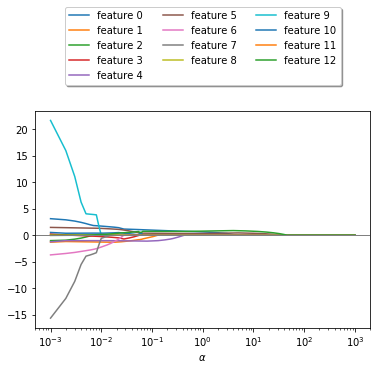

In [45]:
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,13):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

In [46]:

scores = cross_val_score(Lasso_reg, X, y, cv = 6, scoring = 'r2')
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))


Cross-validation scores: [ 0.62726219  0.68739303  0.47171303  0.42593519  0.66967321 -0.56407793]
Average cross-validation score: 0.39


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [47]:
f = open('result.csv', 'a')
line = 'Lasso, penalty = l1 - max_iter = 5000, ' + str(lasso.score(X_train,y_train)) + ',' + str(lasso.score(X_train,y_train)) + '\n'
f.write(line)
f.close()

# # Polynomian Reg 

Best degree 4 with RMSE 1.013947796825624e-08


Text(0, 0.5, 'RMSE')

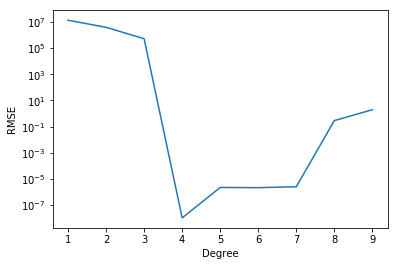

In [48]:


X = np.arange(100).reshape(100, 1)
y = X**4 + X**3 + X + 1

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

rmses = []
degrees = np.arange(1, 10)
min_rmse, min_deg = 1e10, 0

for deg in degrees:

    # Train features
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    x_poly_train = poly_features.fit_transform(x_train)

    # Linear regression
    poly_reg = LinearRegression()
    poly_reg.fit(x_poly_train, y_train)

    # Compare with test data
    x_poly_test = poly_features.fit_transform(x_test)
    poly_predict = poly_reg.predict(x_poly_test)
    poly_mse = mean_squared_error(y_test, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)

    # Cross-validation of degree
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_deg = deg

# Plot and present results
print('Best degree {} with RMSE {}'.format(min_deg, min_rmse))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


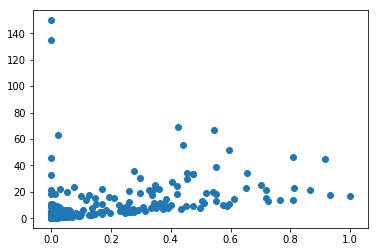

In [130]:
# split dataset
from sklearn.model_selection import train_test_split
X = df.drop(['Audit_Risk','Risk'], axis = 1)
y = df['Audit_Risk']
#x = data[['PARA_B','Risk_B','TOTAL','Inherent_Risk','Loss']]
#X.shape

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

from  sklearn.preprocessing  import PolynomialFeatures

X_train_1 = X_train[:,3].reshape(-1,1)
plt.scatter(X_train_1,y_train)

In [131]:
train_score_list = []
test_score_list = []

for n in range(1,5):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    test_score_list.append(lreg.score(X_test_poly, y_test))

In [132]:
print(train_score_list)
print(test_score_list)

[0.8734328454331152, 1.0, 1.0, 1.0]
[0.8670236766024229, 0.9980597199015735, 0.968142688474885, 0.9830914288730518]


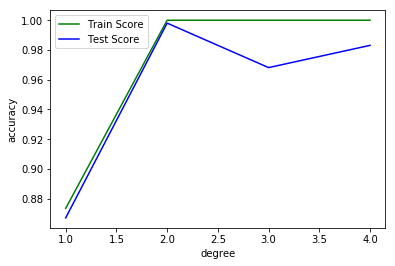

In [133]:
%matplotlib inline

x_axis = range(1,5)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()

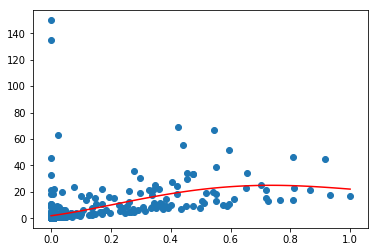

In [134]:
poly = PolynomialFeatures(4)
X_train_poly = poly.fit_transform(X_train_1)
lreg.fit(X_train_poly, y_train)

x_axis = np.linspace(0,1,100).reshape(-1,1)
x_poly = poly.transform(x_axis)
y_predict = lreg.predict(x_poly)

X_train_1 = X_train[:,5].reshape(-1,1)
plt.scatter(X_train_1,y_train)
plt.plot(x_axis, y_predict, c = 'r')

In [135]:

scores = cross_val_score(lreg, X, y, cv = 6, scoring = 'r2')
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))


Cross-validation scores: [ 0.42253316 -0.38427689  0.29420978  0.64045545  0.70245986 -0.68942987]
Average cross-validation score: 0.16


In [55]:
f = open('result.csv', 'a')
line = 'Poly reg, degree-4, ' + str(lreg.fit(X_train,y_train)) + ',' + str(lreg.score(X_train,y_train)) + '\n'
f.write(line)
f.close()

In [ ]:
#result = pd.read_csv('result.csv')
#result

### Based on R^2 and Mean square error we can say that Polynomial Regression gives us the best result. The best regressor for this dataset is  Poly Best degree 4 with RMSE 1.1950480461658478e-08 and we have trained  model on the entire dataset using the best parameters and predicted buzz for the test_set.


In [76]:
test_score_list=[]

poly = PolynomialFeatures(4)
X_train_poly = poly.fit_transform(X)
lreg.fit(X_train_poly, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# <font color='GREEN'> CLASSIFICATION 

In [137]:
#CLASSIFICATION tasks
#Risk as the target column for classification tasks
feature = df.drop(['Risk','Audit_Risk'], axis = 1)
target = df['Risk']
#x = data[['PARA_B','Risk_B','TOTAL','Inherent_Risk','Loss','History_score']]


array([1, 0])

In [185]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [186]:
X_train_org, X_test_org, y_train, y_test = train_test_split(feature, target, random_state = 20, test_size = 0.2)

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

# Logistic Regression

In [187]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c)
    log_l2 = LogisticRegression(penalty = 'l2', C = c)
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [188]:
scores = cross_val_score(log_l2, feature, target, cv = 6, scoring = 'r2')
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.96693361 1.         1.         1.         0.96634615 0.93269231]
Average cross-validation score: 0.98


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

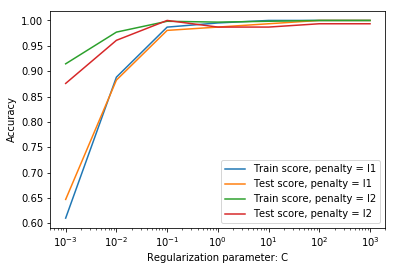

In [189]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

# Grid Search

In [190]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

print("Size of training set: {}   size of test set: {}".format(X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_test, y_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))


Size of training set: 608   size of test set: 153
Best score: 1.00
Best parameters: {'C': 10, 'gamma': 0.1}


In [191]:
from sklearn.svm import SVC

# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(feature, target, random_state=0)

# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the validation set
        score = svm.score(X_valid, y_valid)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

# rebuild a model on the combined training and validation set,
# and evaluate it on the test set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Size of training set: 427   size of validation set: 143   size of test set: 191

Best score on validation set: 1.00
Best parameters:  {'C': 1, 'gamma': 0.001}
Test set score with best parameters: 0.98


In [192]:
svc_cv = SVC(gamma = 0.001, C = 1)
scores = cross_val_score(svc_cv, feature, target, cv = 6, scoring = 'r2')
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.96693361 0.96693361 1.         0.89903846 0.62980769 0.46153846]
Average cross-validation score: 0.82


# Decision Trees

In [193]:
%matplotlib notebook
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(feature, target, stratify=target, random_state=0)

dtree = DecisionTreeClassifier(random_state=0)

dtree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.995


In [194]:
dtree = DecisionTreeClassifier(max_depth=4, random_state=0)
dtree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.995


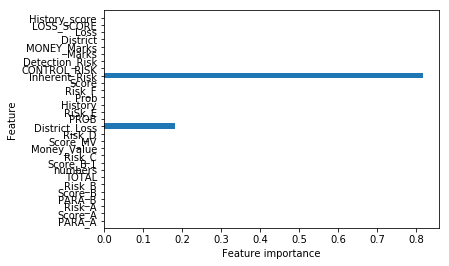

In [195]:
%matplotlib inline
def plot_feature_importances(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(dtree)

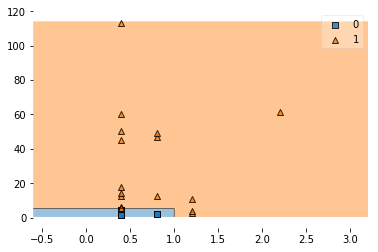

In [196]:
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier
X_b =  X_train.iloc[:50,[-8,-9]].values
y_b = y_train.iloc[:50].values

dtree = DecisionTreeClassifier()
dtree.fit(X_b, y_b)

plot_decision_regions(X_b, y_b, clf = dtree)

In [197]:
dtree_cv = dtree
scores = cross_val_score(dtree_cv, feature, target, cv = 6, scoring = 'r2')
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [1.         0.96693361 1.         1.         0.96634615 1.        ]
Average cross-validation score: 0.99


### KNN Classifier

In [291]:
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsClassifier()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)


{'n_neighbors': 1}

In [298]:
from sklearn.preprocessing import StandardScaler

X_train_org, X_test_org, y_train, y_test = train_test_split(feature,target,random_state=27)

sc = RobustScaler()
X_train = sc.fit_transform(X_train_org)
X_test = sc.transform(X_test_org)

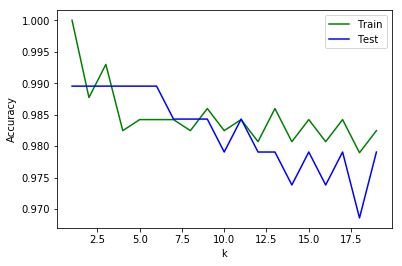

In [299]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

train_array = []
test_array = []
x_axis = range(1,20)

for k in range(1,20):
    knn=KNeighborsClassifier(k)   
    knn.fit(X_train,y_train)
    train_score=knn.score(X_train,y_train)
    test_score=knn.score(X_test,y_test)
    train_array.append(train_score)
    test_array.append(test_score)

line1, = plt.plot(x_axis, train_array, c='g', label = 'Train')
line2, = plt.plot(x_axis, test_array, c='b', label = 'Test')
plt.axis()
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend(handles = [line1, line2],loc = 1)
plt.show()

In [300]:
knn=KNeighborsClassifier(9)   
knn.fit(X_train,y_train)
train_score=knn.score(X_train,y_train)
test_score=knn.score(X_test,y_test)

print('Train score=',train_score,'Test score=',test_score)


Train score= 0.9859649122807017 Test score= 0.9842931937172775


In [301]:

scores = cross_val_score(knn_cv, feature, target, cv = 6, scoring = 'r2')
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [1.         0.96186186 0.96558266 0.96677132 0.83506494 1.        ]
Average cross-validation score: 0.95


# SVM

In [302]:
from sklearn.svm import SVC

# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(feature,target, random_state=0)

# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=0)

print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the validation set
        score = svm.score(X_valid, y_valid)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

# rebuild a model on the combined training and validation set,
# and evaluate it on the test set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Size of training set: 427   size of validation set: 143   size of test set: 191

Best score on validation set: 0.99
Best parameters:  {'C': 100, 'gamma': 0.001}
Test set score with best parameters: 1.00


In [303]:
import numpy as np

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters,
        # train an SVC
        svm = SVC(gamma=gamma, C=C)
        # perform cross-validation
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # compute mean cross-validation accuracy
        score = np.mean(scores)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
# rebuild a model on the combined training and validation set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [304]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [305]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=6, return_train_score=True)

In [306]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, random_state=0)

In [307]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [308]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 0.1}
Best cross-validation score: 1.00


# SVM

### Linear SVM

In [309]:
from sklearn.svm import SVC

train_score_list = []
test_score_list = []

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svc_lin = SVC(kernel='linear', gamma=gamma, C=C)
        svc_lin.fit(X_train,y_train)
        train_score_list.append(svc_lin.score(X_train,y_train))
        score = svc_lin.score(X_test, y_test)
        test_score_list.append(score)
        if score > best_score:
            best_score = score
            best_parameters = {'gamma': gamma , 'C' : C}
            best_Gamma = gamma
            best_C = C

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Best score: 1.00
Best parameters: {'gamma': 0.001, 'C': 0.1}


In [310]:
svc_lin_cv = SVC(kernel='linear',gamma = best_Gamma, C = best_C)
scores = cross_val_score(svc_lin_cv, feature, target, cv = 10, scoring = 'r2')
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [1.         1.         1.         1.         1.         0.94424065
 0.83272194 0.88848129 1.         0.83272194]
Average cross-validation score: 0.95


## rbf

In [311]:
from sklearn.svm import SVC

train_score_list = []
test_score_list = []

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svc_rbf = SVC(kernel='rbf', gamma=gamma, C=C)
        svc_rbf.fit(X_train,y_train)
        train_score_list.append(svc_rbf.score(X_train,y_train))
        score = svc_rbf.score(X_test, y_test)
        test_score_list.append(score)
        if score > best_score:
            best_score = score
            best_parameters = {'gamma': gamma , 'C' : C}
            best_Gamma = gamma
            best_C = C

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Best score: 1.00
Best parameters: {'gamma': 0.001, 'C': 10}


In [312]:
svc_rbf_cv = SVC(kernel='rbf',gamma = best_Gamma, C = best_C)
scores = cross_val_score(svc_rbf_cv, feature, target, cv = 6, scoring = 'r2')
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [1.         1.         1.         0.89903846 0.89903846 0.86538462]
Average cross-validation score: 0.94


## Poly

In [313]:
from sklearn.svm import SVC

train_score_list = []
test_score_list = []

best_score = 0

for degree in range(1,5):
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svc_poly = SVC(kernel='poly', degree = degree, C=C, gamma = 'auto')
        svc_poly.fit(X_train,y_train)
        train_score_list.append(svc_poly.score(X_train,y_train))
        score = svc_poly.score(X_test, y_test)
        test_score_list.append(score)
        if score > best_score:
            best_score = score
            best_parameters = {'degree': degree , 'C' : C}
            best_Degree = degree
            best_C = C

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Best score: 1.00
Best parameters: {'degree': 1, 'C': 1}


In [314]:
svc_poly_cv = SVC(kernel='poly',degree = best_Degree, C=best_C, gamma = 'auto')
scores = cross_val_score(svc_poly_cv, feature,target, cv = 6, scoring = 'r2')
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [1.         1.         1.         0.89903846 0.86538462 0.86538462]
Average cross-validation score: 0.94


### The average CV is highest for decision tree. It is giving the best results.

# Evaluation

### Recall will be the good evaluation strategy  in this situation of Target variable as Risk/Audit Risk. It would be more useful to find out True positive/(True positive+False negeative)

In [315]:
from sklearn.dummy import DummyClassifier

y = target == 1
X_train, X_test, y_train, y_test = train_test_split(feature, y, random_state=0)
dummy_majority = DummyClassifier(strategy='most_frequent')
dummy_majority.fit(X_train, y_train)

pred_most_frequent = dummy_majority.predict(X_test)

print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("Test score: {:.2f}".format(dummy_majority.score(X_test, y_test)))

Unique predicted labels: [False]
Test score: 0.63


In [316]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Test score: {:.2f}".format(tree.score(X_test, y_test)))

Test score: 0.99


In [317]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy score: {:.2f}".format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg score: {:.2f}".format(logreg.score(X_test, y_test)))

dummy score: 0.51
logreg score: 0.99


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [318]:
pred_knn = knn.predict(X_test)

In [319]:
pred_svm_lin = svc_lin.predict(X_test)

In [320]:
pred_svm_rbf = svc_rbf.predict(X_test)

In [321]:
pred_svm_poly = svc_poly.predict(X_test)

In [322]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[120   1]
 [  0  70]]


In [323]:
print("Most frequent class:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\nDummy model:")
print(confusion_matrix(y_test, pred_dummy))
print("\nDecision tree:")
print(confusion_matrix(y_test, pred_tree))
print("\nLogistic Regression")
print(confusion_matrix(y_test, pred_logreg))
print("\nKNN")
print(confusion_matrix(y_test, pred_knn))
print("\nSVMLinear")
print(confusion_matrix(y_test, pred_svm_lin))
print("\nSVMrbf")
print(confusion_matrix(y_test, pred_svm_rbf))
print("\nSVMpoly")
print(confusion_matrix(y_test, pred_svm_poly))

Most frequent class:
[[121   0]
 [ 70   0]]

Dummy model:
[[76 45]
 [39 31]]

Decision tree:
[[120   1]
 [  0  70]]

Logistic Regression
[[120   1]
 [  0  70]]

KNN
[[52 69]
 [ 0 70]]

SVMLinear
[[120   1]
 [  0  70]]

SVMrbf
[[80 41]
 [ 0 70]]

SVMpoly
[[120   1]
 [  0  70]]


In [324]:
from sklearn.metrics import f1_score

print("f1 score most frequent: {:.2f}".format(f1_score(y_test, pred_most_frequent)))
print("f1 score dummy: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("f1 score tree: {:.2f}".format(f1_score(y_test, pred_tree)))
print("f1 score logistic regression: {:.2f}".format(f1_score(y_test, pred_logreg)))
print("f1 score KNN Classifier: {:.2f}".format(f1_score(y_test, pred_knn)))
print("f1 score Svc Linear: {:.2f}".format(f1_score(y_test, pred_svm_lin)))
print("f1 score Svc rbf: {:.2f}".format(f1_score(y_test, pred_svm_rbf)))
print("f1 score SVc poly: {:.2f}".format(f1_score(y_test, pred_svm_poly)))


f1 score most frequent: 0.00
f1 score dummy: 0.42
f1 score tree: 0.99
f1 score logistic regression: 0.99
f1 score KNN Classifier: 0.67
f1 score Svc Linear: 0.99
f1 score Svc rbf: 0.77
f1 score SVc poly: 0.99


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [251]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_most_frequent, target_names=["No Risk", "Risk"]))


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

     No Risk       0.63      1.00      0.78       121
        Risk       0.00      0.00      0.00        70

   micro avg       0.63      0.63      0.63       191
   macro avg       0.32      0.50      0.39       191
weighted avg       0.40      0.63      0.49       191



In [252]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_tree, target_names=["No Risk", "Risk"]))


              precision    recall  f1-score   support

     No Risk       1.00      0.99      1.00       121
        Risk       0.99      1.00      0.99        70

   micro avg       0.99      0.99      0.99       191
   macro avg       0.99      1.00      0.99       191
weighted avg       0.99      0.99      0.99       191



In [253]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_logreg, target_names=["No Risk", "Risk"]))


              precision    recall  f1-score   support

     No Risk       1.00      0.99      1.00       121
        Risk       0.99      1.00      0.99        70

   micro avg       0.99      0.99      0.99       191
   macro avg       0.99      1.00      0.99       191
weighted avg       0.99      0.99      0.99       191



In [254]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_knn, target_names=["No Risk", "Risk"]))


              precision    recall  f1-score   support

     No Risk       1.00      0.61      0.76       121
        Risk       0.60      1.00      0.75        70

   micro avg       0.75      0.75      0.75       191
   macro avg       0.80      0.81      0.75       191
weighted avg       0.85      0.75      0.76       191



In [255]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_svm_lin, target_names=["No Risk", "Risk"]))


              precision    recall  f1-score   support

     No Risk       1.00      0.99      1.00       121
        Risk       0.99      1.00      0.99        70

   micro avg       0.99      0.99      0.99       191
   macro avg       0.99      1.00      0.99       191
weighted avg       0.99      0.99      0.99       191



In [256]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_svm_rbf, target_names=["No Risk", "Risk"]))


              precision    recall  f1-score   support

     No Risk       1.00      0.66      0.80       121
        Risk       0.63      1.00      0.77        70

   micro avg       0.79      0.79      0.79       191
   macro avg       0.82      0.83      0.78       191
weighted avg       0.86      0.79      0.79       191



In [257]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_svm_poly, target_names=["No Risk", "Risk"]))


              precision    recall  f1-score   support

     No Risk       1.00      0.99      1.00       121
        Risk       0.99      1.00      0.99        70

   micro avg       0.99      0.99      0.99       191
   macro avg       0.99      1.00      0.99       191
weighted avg       0.99      0.99      0.99       191



### Decision Tree gives us the best model based on the Classification Report and confusion matrix. Thw Cross Validation average was .99 and Train test score were 1 and 0.995 resp.

In [258]:
from sklearn.metrics import precision_recall_curve
from sklearn.svm import SVC

from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt

X = feature
y = target
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

svc = SVC(kernel = 'rbf', C = 0.1, gamma = 10)
svc.fit(X_train, y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

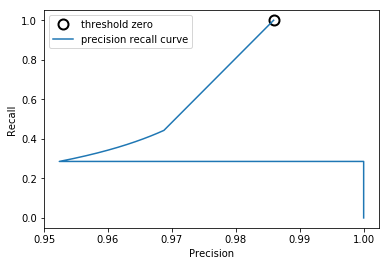

In [259]:
%matplotlib inline

precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.show()

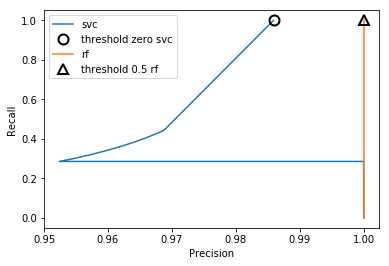

In [260]:
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

# RandomForestClassifier has predict_proba, but not decision_function
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(precision, recall, label="svc")

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero svc", fillstyle="none", c='k', mew=2)

plt.plot(precision_rf, recall_rf, label="rf")

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k',
         markersize=10, label="threshold 0.5 rf", fillstyle="none", mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.show()

In [261]:
print("f1_score of random forest: {:.3f}".format(f1_score(y_test, rf.predict(X_test))))

print("f1_score of svc: {:.3f}".format(f1_score(y_test, svc.predict(X_test))))

f1_score of random forest: 0.979
f1_score of svc: 0.819


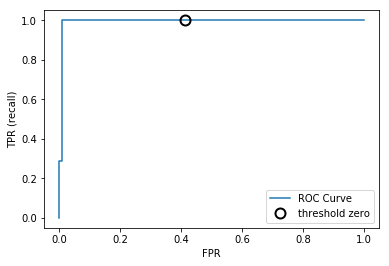

In [262]:
%matplotlib inline


from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.show()

In [263]:
# The best model is decision tree 

gamma = 1.00  accuracy = 0.94  AUC = 0.99
gamma = 0.10  accuracy = 0.99  AUC = 1.00
gamma = 0.01  accuracy = 0.99  AUC = 1.00


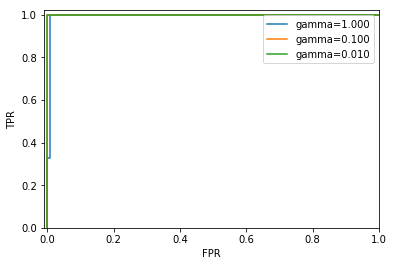

In [264]:
%matplotlib inline

from sklearn.metrics import roc_auc_score

y = target == 1

X_train, X_test, y_train, y_test = train_test_split(
    feature, y, random_state=0)

plt.figure()

for gamma in [1, 0.1, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test , svc.decision_function(X_test))
    print("gamma = {:.2f}  accuracy = {:.2f}  AUC = {:.2f}".format(
    	gamma, accuracy, auc))
    plt.plot(fpr, tpr, label="gamma={:.3f}".format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")
plt.show()